In [92]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [41]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',skiprows = 1, header = None)
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [42]:
col_labels = ['age', 'workclass', 'fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','wage_class'] 

In [43]:
train_set.columns = col_labels
test_set.columns = col_labels

In [44]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [45]:
train_set.isnull().sum().count

<bound method Series.count of age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64>

In [46]:
test_set.isnull().sum().count

<bound method Series.count of age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64>

## Label Encoding for training data


In [47]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

train_set['workclass'] = label_encoder.fit_transform(train_set['workclass'])

In [48]:
train_set['workclass'].unique()

array([7, 6, 4, 1, 2, 0, 5, 8, 3])

In [50]:
train_set['workclass'] = label_encoder.fit_transform(train_set['workclass'])
train_set['education'] = label_encoder.fit_transform(train_set['education'])
train_set['marital_status'] = label_encoder.fit_transform(train_set['marital_status'])
train_set['occupation'] = label_encoder.fit_transform(train_set['occupation'])
train_set['relationship'] = label_encoder.fit_transform(train_set['relationship'])
train_set['race'] = label_encoder.fit_transform(train_set['race'])
train_set['sex'] = label_encoder.fit_transform(train_set['sex'])
train_set['native_country'] = label_encoder.fit_transform(train_set['native_country'])


In [51]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K


In [52]:
train_set['wage_class'] = label_encoder.fit_transform(train_set['wage_class'])

In [53]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [54]:
train_set['wage_class'].unique()

array([0, 1])

## Label Encoding for test data


In [55]:
test_set['workclass'] = label_encoder.fit_transform(test_set['workclass'])
test_set['education'] = label_encoder.fit_transform(test_set['education'])
test_set['marital_status'] = label_encoder.fit_transform(test_set['marital_status'])
test_set['occupation'] = label_encoder.fit_transform(test_set['occupation'])
test_set['relationship'] = label_encoder.fit_transform(test_set['relationship'])
test_set['race'] = label_encoder.fit_transform(test_set['race'])
test_set['sex'] = label_encoder.fit_transform(test_set['sex'])
test_set['native_country'] = label_encoder.fit_transform(test_set['native_country'])
test_set['wage_class'] = label_encoder.fit_transform(test_set['wage_class'])

In [56]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38,0


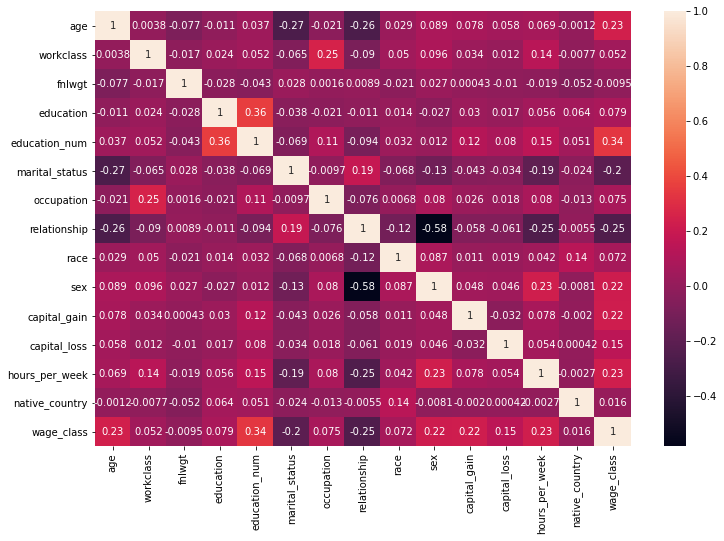

In [68]:
corr = train_set.corr()
fig, ax = plt.subplots(figsize=(12,8)) 
sns.heatmap(corr,annot=True,ax=ax)

In [73]:
hours_per_week = train_set['hours_per_week']
wage_class = train_set['wage_class']
index = train_set['hours_per_week'].unique()

In [74]:
train_set['hours_per_week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

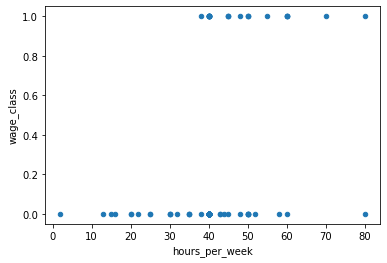

In [86]:
df = pd.DataFrame({'wage_class': wage_class, 'hours_per_week': hours_per_week}, index=index)
ax = df.plot.scatter(x='hours_per_week', y='wage_class', rot=0)

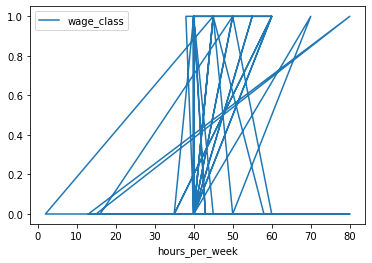

In [87]:
df = pd.DataFrame({'wage_class': wage_class, 'hours_per_week': hours_per_week}, index=index)
ax = df.plot.line(x='hours_per_week', y='wage_class', rot=0)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(train_set.iloc[:, 0:14], train_set.iloc[:, -1], test_size=0.33, random_state=42)

In [121]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [124]:
# make predictions for test data
y_pred = model.predict(X_test)

In [125]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.14%


In [127]:
# make predictions for test data
y_pred = model.predict(test_set.iloc[:, 0:14])